# Week9 - Ensemble Assignment

* Train-test split
* Train a random forest model
* Try bagging & boosting algorithms
* Evaluate the models
* Explain findings

Cole Dwiggins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

def generate_dataset():   
    X, y = make_circles(n_samples=1000,noise=0.1, random_state=42)
    df1 = pd.DataFrame(X)
    df1['y'] = y
    
    X1, y1 = make_moons(n_samples=1000, noise=0.1, random_state=42)
    df2 = pd.DataFrame(X1)
    df2['y'] = y
    
    df = pd.concat([df1, df2])
    df = df.sample(frac=1).reset_index(drop=True)
    return df[[0,1]].to_numpy(), df.y

In [3]:
X, y = generate_dataset()

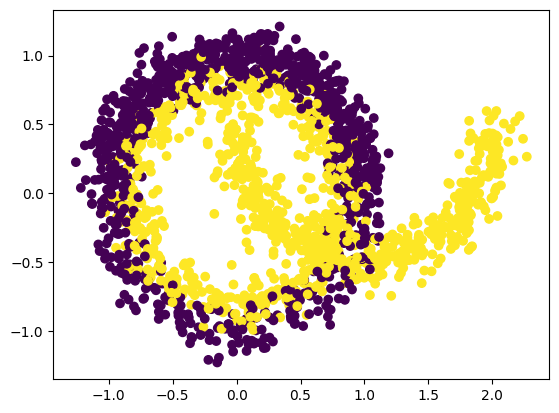

In [4]:
plt.scatter(X[:,0], X[:,1],c=y)

In [5]:
y.value_counts()

y
1    1000
0    1000
Name: count, dtype: int64

In [6]:
X

array([[-0.0140608 ,  0.14500789],
       [-0.61640592, -0.80749568],
       [ 0.56902312,  0.87742402],
       ...,
       [ 0.54601333,  0.74480293],
       [ 0.40953534,  0.79953422],
       [-0.08970311,  0.98872213]])

In [7]:
y

0       1
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: y, Length: 2000, dtype: int64

## Random Forest Model

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

rf_modeling_pipeline = Pipeline([
    ('rf', RandomForestClassifier())
])

In [10]:
rf_param_grid = [
    {
        'rf__max_depth': [11, 12, 13],
        'rf__min_samples_leaf': [5, 6, 7]
    }
]

scoring = 'accuracy'

rf_gc = GridSearchCV(estimator=rf_modeling_pipeline, param_grid=rf_param_grid, cv=5, scoring=scoring)
rf_gcv_results = rf_gc.fit(X_train, y_train)

In [11]:
rf_gcv_results.best_params_

{'rf__max_depth': 12, 'rf__min_samples_leaf': 7}

In [12]:
rf_gcv_results.score(X_train, y_train)

0.9075

In [13]:
rf_gcv_results.score(X_test, y_test)

0.85

As a baseline, the random forest model with a max depth of 12 and a minimum samples per leaf produced a model with an accuracy of 91% on the training data and 85% on the testing data.

## Bagging Algorithm

In [14]:
from sklearn.ensemble import BaggingClassifier

rf = RandomForestClassifier()
bclf = BaggingClassifier(rf)

params = [
    {
        'estimator__max_depth': [11, 12, 13],
        'estimator__min_samples_leaf': [5, 6, 7],
        'n_estimators': [10, 15, 20]
    }
]

blrcv = GridSearchCV(bclf, param_grid=params, cv=5, scoring='accuracy')
blrcv = blrcv.fit(X_train[:100], y_train[:100])

In [15]:
blrcv.best_params_

{'estimator__max_depth': 12,
 'estimator__min_samples_leaf': 5,
 'n_estimators': 10}

In [16]:
blrcv.score(X_train[:100], y_train[:100])

0.86

In [17]:
blrcv.score(X_train, y_train)

0.745

In [18]:
blrcv.score(X_test, y_test)

0.73

The bagging algorithm returned a training score on the subset of data of 86% while it returned a score of 74.5% on the full training data and a score of 73% on the testing data. While the full dataset could be used to produce higher accuracy scores by virtue of a more complete GridSearch, this would exponentially increase computing costs.

## Boosting Algorithms

### AdaBoost

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_depth=12, min_samples_leaf=7)

ada = AdaBoostClassifier(estimator=rf, n_estimators=50, learning_rate=0.1, random_state=1)
ada = ada.fit(X_train, y_train)
ada_train_predict = ada.predict(X_train)
ada_test_predict = ada.predict(X_test)

ada_train_score = accuracy_score(y_train, ada_train_predict)
ada_test_score = accuracy_score(y_test, ada_test_predict)

print(f'AdaBoost Training Score: {ada_train_score:.2%}')
print(f'AdaBoost Test Score: {ada_test_score:.2%}')

AdaBoost Training Score: 95.75%
AdaBoost Test Score: 86.50%


### Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(max_depth=7, n_estimators=100)
gb = gb.fit(X_train, y_train)
gb_train_predict = gb.predict(X_train)
gb_test_predict = gb.predict(X_test)

gb_train_score = accuracy_score(y_train, gb_train_predict)
gb_test_score = accuracy_score(y_test, gb_test_predict)

print(f'Gradient Boost Training Score: {gb_train_score:.2%}')
print(f'Gradient Boost Test Score: {gb_test_score:.2%}')

Gradient Boost Training Score: 99.69%
Gradient Boost Test Score: 84.25%


### Conclusion

The accuracy of the models on the testing data after doing AdaBoosting and Gradient Boosting were 86.50% and 84.25%, respectively, which were both around or about the same as the testing data score of 85% on the base random forest model. This means that these ensemble models are not necessary for this machine learning problem. It is possible that a better score could be generated by implementing a set of hyperparameters to test using GridSearchCV, but this would cost much more computing power without a significant boost in the accuracy.